#### Name: Eric Lindgren
#### CID: ericlin
#### PSN: 970222-1954

## Gaussian process regression

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import GPy
%matplotlib inline

### Task 1

In [16]:
# Load experimental data sample
z_sample, mu_sample, dmu = np.loadtxt('cosmology_sample.dat',unpack=True)

# data must be two-dimensional for GPy
x = z_sample.reshape((-1,1))
y = mu_sample.reshape((-1,1))
print('The experimental data is of shape:', y.shape)
print(f'The average error for the samples is {dmu.mean():.3}.')

# Load true function
z, mu_true = np.loadtxt('cosmology_true.dat',unpack=True)

print('The true function data is of shape:', mu_true.shape)

The experimental data is of shape: (100, 1)
The average error for the samples is 0.943.
The true function data is of shape: (1000,)


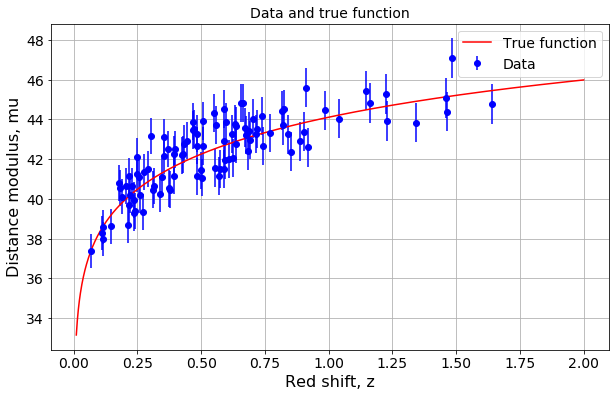

In [3]:
# Plot the data
# Set plot params
plt.rc('font', size=14)          # controls default text sizes
plt.rc('axes', titlesize=14)     # fontsize of the axes title
plt.rc('axes', labelsize=16)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=14)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14)    # fontsize of the tick labels
plt.rc('legend', fontsize=14)    # legend fontsize

fig, ax = plt.subplots(figsize=(10,6))
ax.errorbar(x=x, y=y, yerr=dmu, fmt='o', color='b', label='Data')
# Plot true data as well
ax.plot(z, mu_true, 'r', label="True function")

ax.set_xlabel("Red shift, z")
ax.set_ylabel("Distance modulus, mu")
ax.set_title("Data and true function")
plt.grid()
plt.legend(loc="best")

#### Task 2

In [4]:
# Create model

# First, define an exponentiated quadratic covariance function
k = GPy.kern.RBF(input_dim=1, variance=1., lengthscale=1.)

# Second, use this covariance function to create a model for our data
model_2 = GPy.models.GPRegression(x,y,k)

In [5]:
# Print hyperparameters of kernel before optimization
print(model_2)


Name : GP regression
Objective : 1316.1261625137322
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |  value  |  constraints  |  priors
  rbf.variance             |    1.0  |      +ve      |        
  rbf.lengthscale          |    1.0  |      +ve      |        
  Gaussian_noise.variance  |    1.0  |      +ve      |        


In [6]:
# Optimize model to data using GPy
model_2.constrain_positive()  # Constrain our variances to be positive.
model_2.optimize()

reconstraining parameters GP_regression


In [7]:
# Print optimized parameters
print(model_2)


Name : GP regression
Objective : 152.57170381374064
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |               value  |  constraints  |  priors
  rbf.variance             |  1000.2044403781194  |      +ve      |        
  rbf.lengthscale          |  3.0174646003797188  |      +ve      |        
  Gaussian_noise.variance  |  1.0005767169922595  |      +ve      |        


The Gaussian noise variance is approximately one. This is the same as the defualt value of this parameter for our model, which means that either our data wasn't sufficient to optimize this parameter, or the variance of the data is around 1. The latter seems reasonable, since the datapoints are distributed in a band approximately equal to $y = y_{true} \pm 2$, which would correspond to $\pm 2\sigma$. 

In [8]:
# Calculate log likelihood of the data using this model
log_like = model_2.log_likelihood()
print(f'The log likelihood of the model is: {log_like:.2f}.')

The log likelihood of the model is: -152.57.


{'dataplot': [<matplotlib.collections.PathCollection at 0x1fc24919bc8>],
 'gpmean': [[<matplotlib.lines.Line2D at 0x1fc24943188>]],
 'gpconfidence': [<matplotlib.collections.PolyCollection at 0x1fc27568b08>]}

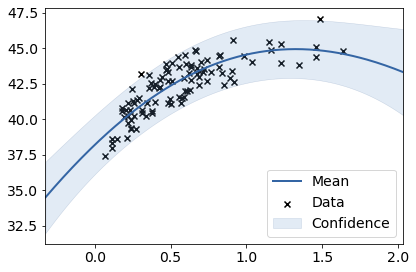

In [9]:
# Plot the model and data
model_2.plot()  # Plots data and 95% confidence region

#### Task 3

reconstraining parameters GP_regression


Model before optimization: 
Name : GP regression
Objective : 152.23492965367768
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |   value  |  constraints  |  priors
  rbf.variance             |  1000.0  |      +ve      |        
  rbf.lengthscale          |     1.2  |      +ve      |        
  Gaussian_noise.variance  |     1.0  |      +ve      |        
************************************************
Optimized model: 
Name : GP regression
Objective : 151.9135392511964
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |               value  |  constraints  |  priors
  rbf.variance             |  1000.0000119807419  |      +ve      |        
  rbf.lengthscale          |  1.4362310387962043  |      +ve      |        
  Gaussian_noise.variance  |  0.9253990430425019  |      +ve      |        
The log likelihood of model for task 3 is: -151.91.


 C:\Miniconda3\envs\physics\lib\site-packages\paramz\transformations.py:111: RuntimeWarning:overflow encountered in expm1


{'dataplot': [<matplotlib.collections.PathCollection at 0x1fc24281908>],
 'gpmean': [[<matplotlib.lines.Line2D at 0x1fc2427f8c8>]],
 'gpconfidence': [<matplotlib.collections.PolyCollection at 0x1fc24943348>]}

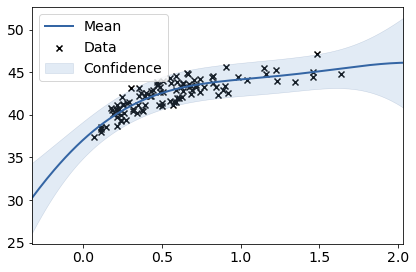

In [10]:
# Redo analysis, but initialize with different parameters.

k = GPy.kern.RBF(input_dim=1, variance=1000., lengthscale=1.2)
model_3 = GPy.models.GPRegression(x,y,k)
print(f'Model before optimization: {model_3}')
print('************************************************')
# Optimize model to data using GPy
model_3.constrain_positive()  # Constrain our variances to be positive.
model_3.optimize()
print(f'Optimized model: {model_3}')

log_like = model_3.log_likelihood()
print(f'The log likelihood of model for task 3 is: {log_like:.2f}.')

model_3.plot()  # Plots data and 95% confidence region

We note that the fit to the data points are much better in the case of a slightly longer timescale and higher variance (Task 3). Also, the error band widens much more noticeably outside the data interval which is more honest, and finally we see that the mean for task 3 is much more in line with the true data $y_{true}$.

In task 3, we initialize the kernel with a much larger variance. This leads to our Gaussian function having the ability to attain larger values to fit the problem at hand. But what we primarily see is the impact of the changed lengthscale parameter. A change in lengthscale affects the "scale" of the x-values of the model, spreading them out a bit. A slightly larger length scale which we have in Task 3 basically allows the model to "reach" all the x-values. 

#### Task 4

In [11]:
# Create the array
Xp = np.linspace(0.0,2.0,50)[:,None]

In [12]:
# Use the model from Task 3 - extract the mean vector and the covariance matrix from the model
mu, C = model_3.predict(Xp, full_cov=True)

At each point in Xp we use our model to calculate the mean-value and the standard deviation. We then use this information to define a multivariate Gaussian, with "one gaussian" for each of the points in Xp. Then, we draw 20 samples from this Gaussian. Each of these samples are multi-dimensional, where each dimension corresponds to a sample from a certain Gaussian for each x-value in Xp. Then, by computing the mean and standard deviation across the sample dimension (20), we effectively get a mean value for each point in Xp, and it's standard deviation.

In [13]:
# Draw 20 samples from the Gaussian defined by mu and C
mu = mu.reshape((len(Xp),))
samples = np.random.multivariate_normal(mu, C, 20)

In [14]:
# Extract mean vector and standard deviation vector:
mean_vector = samples.mean(axis=0)  # Take the mean along the 20 samples
std_vector = samples.std(axis=0)

(20, 50)
(50,)


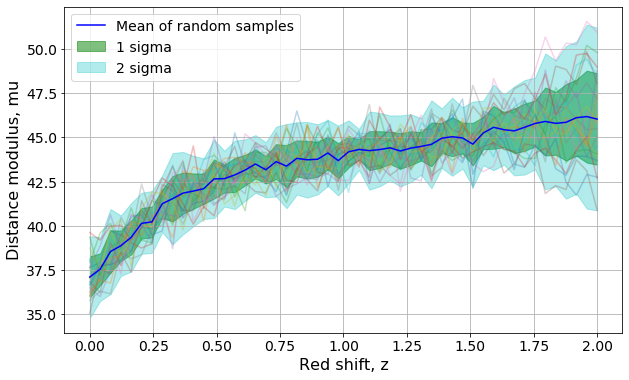

In [15]:
# Plot them
Xp = Xp.reshape((len(Xp),))
fig, ax = plt.subplots(figsize=(10,6))

print(samples.shape)
print(Xp.shape)
ax.plot(Xp, samples.T, alpha=0.3)
ax.plot(Xp, mean_vector, 'b', label='Mean of random samples')
ax.fill_between(Xp, mean_vector-std_vector, mean_vector+std_vector, color='g', label="1 sigma", alpha=0.5)
ax.fill_between(Xp, mean_vector-2*std_vector, mean_vector+2*std_vector, color='c', label="2 sigma", alpha=0.3)
#pl.fill_between(x, y-error, y+error)

ax.set_xlabel("Red shift, z")
ax.set_ylabel("Distance modulus, mu")
ax.set_title("")
plt.grid()
plt.legend(loc="best")

This plot looks somewhat similar to the plot in Task 3, with similar size of error bands, and our mean coincides somewhat with the mean from Task 3. However, the error bands and the mean values aren't as smooth as from Task 3. This can be greatly improved however, by increasing the number of samples from our multivariate Gaussian. If the number of samples is increased to 10000, and the length of the vector Xp is also increased, the difference between the plots are negligible. 